In [2]:
!pip install missingno

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [309]:
#read the CSV file
df = pd.read_csv("C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assign3\\nyc-rolling-sales-dirty.csv")
df

C:\Users\waliullah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12-09-16 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,07-05-17 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [310]:
#list all columns
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [311]:
#see data types
df.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [312]:
#to find rows and columns
df.shape

(84548, 22)

# To find out Missing Values

In [313]:
df.isnull().sum()

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

 # Functions to convert errors in data into Null Values

In [314]:
# Functions to convert errors in data into Null Values
def w1(string):
    if ('No Number' in string):
        return np.NaN
    elif ('-' in string):
        return np.NaN
    elif ('v'in string):
        return np.NaN
    elif string==0:
        return np.NaN
    else:
        return int(string)

def building(string):
    if string=='65000':
        return np.NaN
    else:
        return string    
    

def w2(string):
    if ('-' in string):
        return np.NaN
    else:
        return int(string)
def year(string):
    if string==0:
        return np.NaN
    elif ('-' in string):
        return np.NaN
    elif ('later' in string):
        return np.NaN
    elif ('why' in string):
        return np.NaN
    elif ('not sure' in string):
        return np.NaN
    else:
        return int(string)

def year1(string):
    if ('-' in string):
        return np.NaN
    elif ('later' in string):
        return np.NaN
    elif ('why' in string):
        return np.NaN
    elif ('not sure' in string):
        return np.NaN
    else:
        return string

def w3(string):
    if (' ' in string):
        return np.NaN
    else:
        return string

# TypeCasting and running the functions on specific columns which has errors

In [315]:
#few Typecasting 
df['LOT'] = df['LOT'].astype(str) 
df['LOT']=df['LOT'].map(lambda x: w1(x))

In [316]:
#df['LOT'] = df['LOT'].astype(str) 
df['BUILDING CLASS AT PRESENT']=df['BUILDING CLASS AT PRESENT'].map(lambda x: building(x))

In [317]:
df['YEAR BUILT']=df['YEAR BUILT'].astype(str) 
df['YEAR BUILT']=df['YEAR BUILT'].map(lambda x: year(x))

In [318]:
df['SALE DATE']=df['SALE DATE'].astype(str) 
df['SALE DATE']=df['SALE DATE'].map(lambda x: year1(x))


In [290]:
df1=df.copy()

In [291]:

df1['SALE DATE'] = df1['SALE DATE'].astype(str)
df1['SALE YEAR']=df1['SALE DATE'].map(lambda x: x[-9:-5])


In [292]:
df1['SALE YEAR'] = df1['SALE YEAR'].astype(str) 
df1['SALE YEAR']=df1['SALE YEAR'].map(lambda x: w3(x))

In [319]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,,NaN,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,NaN
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39.0,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,NaN
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21.0,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55.0,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34.0,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78.0,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60.0,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,NaN
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28.0,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [320]:
df['SALE DATE'] = df['SALE DATE'].astype(str)
df['SALE YEAR']=df['SALE DATE'].map(lambda x: x[-9:-5])
df = df.drop(['SALE DATE'],axis=1)

In [272]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016


In [321]:
df['SALE PRICE']=df['SALE PRICE'].map(lambda x: w2(x))

In [322]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].map(lambda x: w2(x))

In [323]:
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].map(lambda x: w2(x))

In [324]:
df['SALE YEAR'] = df['SALE YEAR'].astype(str) 
df['SALE YEAR']=df['SALE YEAR'].map(lambda x: w3(x))

In [325]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,,NaN,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39.0,,C7,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21.0,,C4,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55.0,,C2,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34.0,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78.0,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60.0,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28.0,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016


# Filling the Missing Values

In [335]:
df2=df.copy()

In [336]:
 df2.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             1
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE YEAR                             0
dtype: int64

In [337]:
df2

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,,NaN,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39.0,,C7,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21.0,,C4,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55.0,,C2,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34.0,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78.0,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60.0,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28.0,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016


In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Sales per Borough')

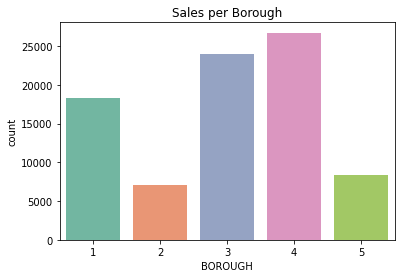

In [329]:
sns.countplot('BOROUGH',data=df2,palette='Set2')
plt.title('Sales per Borough')

Text(0.5, 1.0, 'Sales Rate from 2016-2017')

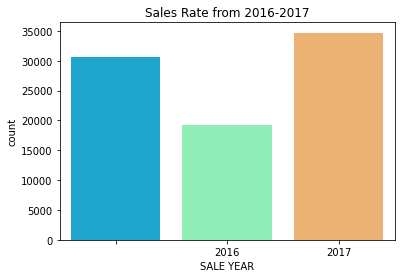

In [330]:
sns.countplot(x='SALE YEAR', data=df2, palette='rainbow')
plt.title('Sales Rate from 2016-2017')

Text(0.5, 1.0, 'Sales per Borough from 2016-2017')

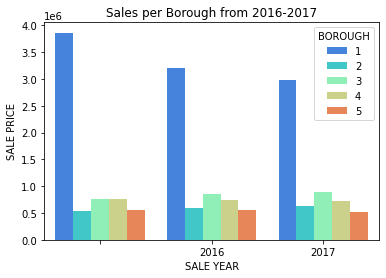

In [331]:
sns.barplot(x='SALE YEAR', y='SALE PRICE', hue='BOROUGH', data=df2, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2016-2017')

<AxesSubplot:>

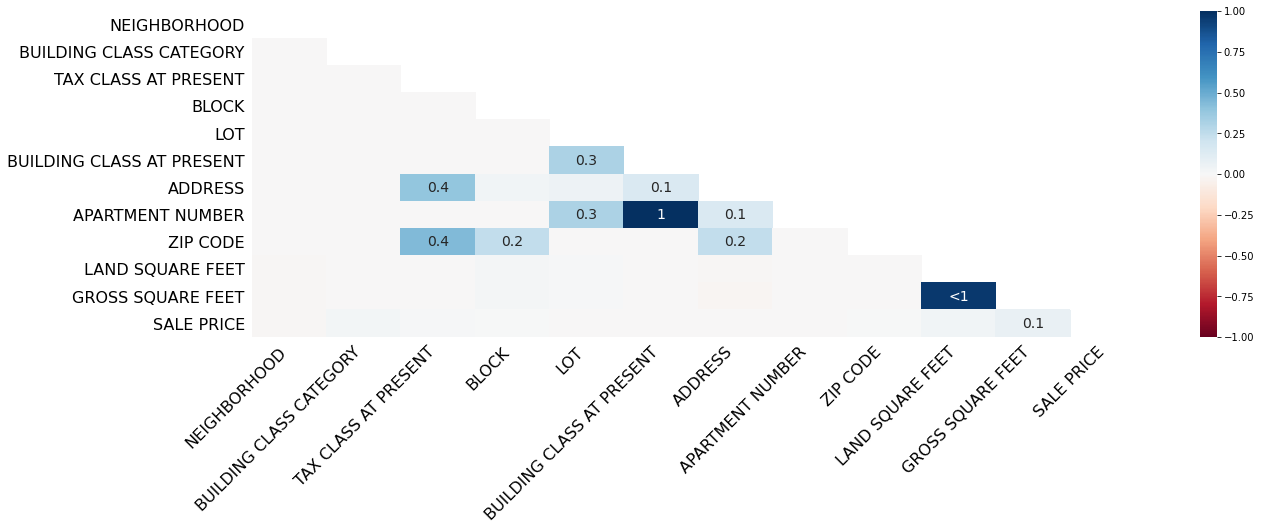

In [340]:
mano.heatmap(df2, figsize=(20,6))

In [376]:
df2.dropna(axis=0,inplace=True)

In [377]:
df2

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376.0,14.0,,C6,244 EAST 7TH STREET,...,24,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017
172,176,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391.0,19.0,,S3,624 EAST 9TH STREET,...,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016
173,177,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393.0,4.0,,S4,165 AVENUE B,...,4,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017
174,178,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394.0,5.0,,S5,183 AVENUE B,...,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,
195,199,1,ALPHABET CITY,22 STORE BUILDINGS,4,390.0,34.0,,K4,115 AVENUE C,...,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34.0,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78.0,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60.0,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28.0,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016


# Filling the Missing Values

The sale Price can be filled by the linear interpolation for each location. 
It is more logical to fill the missing values through linear interpolation in each BOROUGH seperatly because the price in each locality (BOROUGH) vary significantly.


In [388]:
df3=df.copy()

<AxesSubplot:>

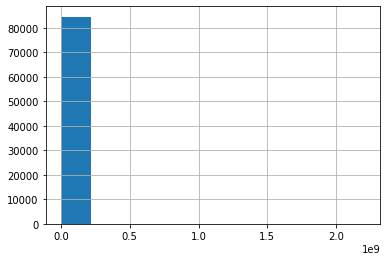

In [396]:
df3['SALE PRICE'] = df3['SALE PRICE'].interpolate(method ='linear', limit_direction ='forward')
df3['SALE PRICE'].hist()

<AxesSubplot:>

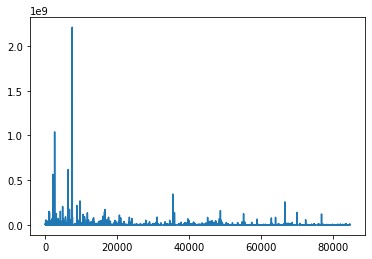

In [397]:
df3['SALE PRICE'].plot()

The Heat Map shows that there is very strong correlation between "Gross Square Feet" and "Land Square Feet". It also seems safe to replace the missing values in these two columns with their mean.

In [398]:
df3['LAND SQUARE FEET'] = df3['LAND SQUARE FEET'].fillna(df3['LAND SQUARE FEET'].mean())
df3['GROSS SQUARE FEET'] = df3['GROSS SQUARE FEET'].fillna(df3['GROSS SQUARE FEET'].mean())

Alternatively, I can use the regression to fill the missing values of price, land square and gross square feet as shown below. But unfortunately, it could not work.

In [369]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [378]:
df4=df2.copy()

In [379]:
# Split dataset into 80% train and 20% validation
X = df4['GROSS SQUARE FEET'].values.reshape(-1, 1)
y = df4['SALE PRICE'].values.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [380]:
# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [381]:
# Apply model to validation
y_predict = model.predict(X_val)

actual_vs_predict = pd.DataFrame({'Actual': y_val.flatten(), 'Prediction':y_predict.flatten()})
actual_vs_predict.sample(12)

,Actual,Prediction
6805,1300000.0,7.844588e+05
782,0.0,1.426832e+06
5070,1275000.0,8.463623e+05
9517,0.0,1.022382e+06
4081,1090000.0,7.247308e+05
3357,4230000.0,1.360182e+06
8197,1.0,7.721967e+05
8338,0.0,9.838159e+05
5112,100.0,4.142242e+05
1625,345000.0,6.396876e+05


# Alternative to this is the following strategy

If we drop the missing values, the number of observations falls to 48138 rows, and the graphs and correlation based on this reduced sample show that
1.	The number of sales increased from the year 2016 to 2017, the sales prices per Borough(location) remained in the same ranges
2.	The property prices are much higher at Manhattan than at any other location.
Based on this, I will divide the sample into five groups based on Borough(location), and will run the regression in which
Dependent variable will be “Sale Price” and Explanatory variables will be
1.	Age of the house (Year Built-Year Sold)
2.	Land Square Feet
3.	Gross Square Feet
4.	Dummy variables for each location (4Dummy variables)

In the next step I will predict the Price of each house. If the error is not so high, I will predict the prices for houses for which the values of set of Explanatory variables is available.

After predicting the prices, I will match the price with (Age of House, Land Square Feet and Gross Square Feet) in each location separately and will guess the values of Age, Land and Gross Square Feet.


In [382]:
print(df3[df3['ZIP CODE'].isna()]['ADDRESS'])

3                             NaN
4                             NaN
6                             NaN
9                             NaN
11        530-532 EAST 5TH STREET
12          327 EAST 3 STREET, 1C
13          327 EAST 3 STREET, 1C
14          327 EAST 3 STREET, 3A
15        327 EAST 3RD STREET, 5A
53370       121-13/15 14TH   ROAD
53371        15-32 127TH   STREET
53373          18-48 120TH STREET
53374    18-27 COLLEGE POINT BLVD
53375        122-11 20TH   AVENUE
53376    21-02 COLLEGE POINT BLVD
53377        14-11 114TH   STREET
53379          126-10 15TH AVENUE
72458       111-45 144TH   STREET
72459      111-28A 145TH   STREET
72460      111-28A 145TH   STREET
72461         111-48 145TH STREET
72462         111-73 145TH STREET
72463        111-60 INWOOD STREET
72464        111-19 INWOOD STREET
72466         111-54 147TH STREET
72467         146-19 LINDEN BLVD.
Name: ADDRESS, dtype: object


In [383]:
print(df3[df3['ADDRESS'].isna()]['ZIP CODE'])

0        10009.0
3            NaN
4            NaN
6            NaN
9            NaN
29996    11219.0
29998    11219.0
29999    11219.0
30000    11219.0
30001    11219.0
30002    11219.0
30003    11219.0
30004    11219.0
30005    11219.0
30006    11219.0
30007    11219.0
30008    11219.0
30009    11219.0
30011    11219.0
30012    11219.0
30014    11219.0
30015    11219.0
30018    11219.0
30020    11219.0
30021    11219.0
30023    11219.0
30024    11219.0
30025    11219.0
30026    11220.0
30028    11220.0
30029    11219.0
Name: ZIP CODE, dtype: float64


In [385]:
IDs1 = ['530-532 EAST 5TH STREET',
'327 EAST 3 STREET, 1C', '327 EAST 3 STREET, 1C','327 EAST 3 STREET, 3A','327 EAST 3RD STREET, 5A','121-13/15 14TH   ROAD','15-32 127TH   STREET',
'18-48 120TH STREET','18-27 COLLEGE POINT BLVD','122-11 20TH   AVENUE','21-02 COLLEGE POINT BLVD','14-11 114TH   STREET','126-10 15TH AVENUE',
'111-45 144TH   STREET','111-28A 145TH   STREET','111-28A 145TH   STREET','111-48 145TH STREET','111-73 145TH STREET','111-60 INWOOD STREET',
'111-19 INWOOD STREET','111-54 147TH STREET','146-19 LINDEN BLVD.']
df3[df3['ADDRESS'].isin(IDs1)]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE PRICE.Interpolate,LAND SQUARE FEET.Modified,GROSS SQUARE FEET.Modified
11,15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,NaN,21.0,,D1,530-532 EAST 5TH STREET,...,3717.0,12350.0,2009,2,D1,10350000.0,2016,10350000.0,3717.00000,12350.000000
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40.0,,C6,"327 EAST 3 STREET, 1C",...,NaN,NaN,1920,2,C6,1.0,,1.0,3776.27041,3574.482036
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40.0,,C6,"327 EAST 3 STREET, 1C",...,NaN,NaN,1920,2,C6,499000.0,,499000.0,3776.27041,3574.482036
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40.0,,C6,"327 EAST 3 STREET, 3A",...,NaN,NaN,1920,2,C6,10.0,2017,10.0,3776.27041,3574.482036
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40.0,,C6,"327 EAST 3RD STREET, 5A",...,NaN,NaN,1920,2,C6,529500.0,,529500.0,3776.27041,3574.482036
53370,3972,4,COLLEGE POINT,14 RENTALS - 4-10 UNIT,2A,4056.0,22.0,,S9,121-13/15 14TH ROAD,...,2204.0,3800.0,1930,2,S9,770000.0,2017,770000.0,2204.00000,3800.000000
53371,3973,4,COLLEGE POINT,21 OFFICE BUILDINGS,4,4092.0,40.0,,O2,15-32 127TH STREET,...,10670.0,18000.0,1925,4,O2,4100000.0,,4100000.0,10670.00000,18000.000000
53373,3975,4,COLLEGE POINT,22 STORE BUILDINGS,4,4081.0,39.0,,K4,18-48 120TH STREET,...,5000.0,4167.0,1930,4,K4,1310000.0,2017,1310000.0,5000.00000,4167.000000
53374,3976,4,COLLEGE POINT,22 STORE BUILDINGS,4,4128.0,9.0,,K1,18-27 COLLEGE POINT BLVD,...,2500.0,870.0,1929,4,K1,930000.0,2017,930000.0,2500.00000,870.000000
53375,3977,4,COLLEGE POINT,22 STORE BUILDINGS,4,4128.0,41.0,,K2,122-11 20TH AVENUE,...,1479.0,2592.0,1931,4,K2,600000.0,2017,600000.0,1479.00000,2592.000000


<AxesSubplot:>

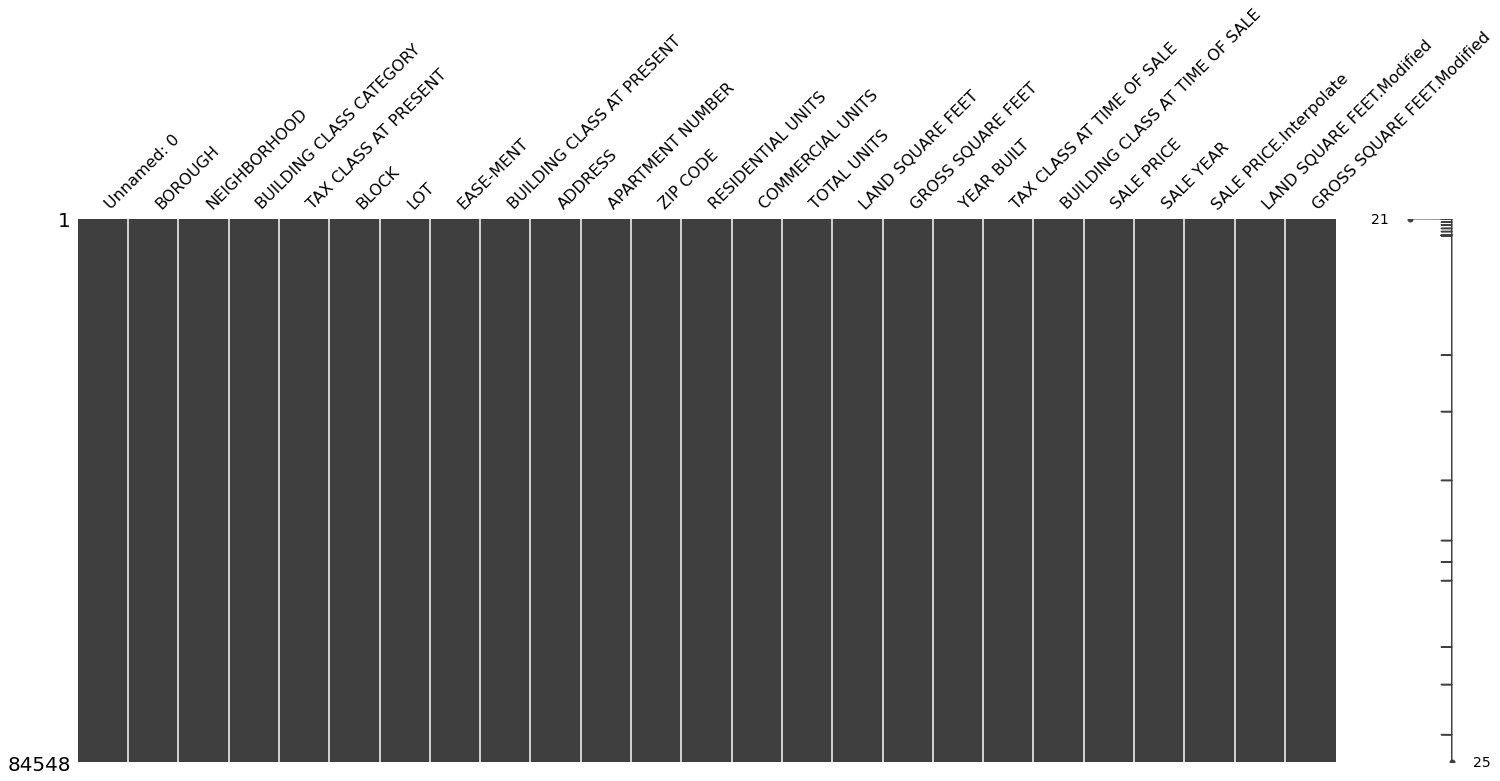

In [399]:
mano.matrix(df3)